# Experiment (VII) : Stellar Kinematics of 300,000 Stars in the Milky Way Galaxy

In [ ]:
from astropy.table import Table

filename = "Gaia_bLT10_pGT5.fits"
gaia_data = Table.read(filename)
gaia_data.info


<Table length=291961>
      name       dtype    unit                  description                    class    
--------------- ------- -------- ------------------------------------------ ------------
             ra float64      deg                            Right ascension       Column
            dec float64      deg                                Declination       Column
       parallax float64      mas                                   Parallax       Column
           pmra float64 mas / yr Proper motion in right ascension direction       Column
          pmdec float64 mas / yr     Proper motion in declination direction       Column
phot_g_mean_mag float32      mag                      G-band mean magnitude       Column
          bp_rp float32      mag                             BP - RP colour       Column
              l float64      deg                                                  Column
              b float64      deg                                                  Column

## Task 1

We will use the formulas d (pc) = $\frac{1000}{p\text{ (mas)}}$  &  $M_G=m_G-5log \frac{d}{10}$


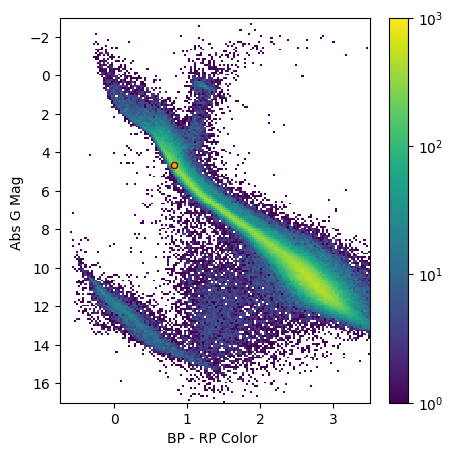

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm



d=1000/gaia_data['parallax']  # Convert parallax from mas to pc

MG = gaia_data['phot_g_mean_mag'] - 5 * np.log10(d / 10) 

cmd_res = (np.linspace(-0.75 ,3.5 ,151) , np.linspace(-3 , 17 , 201) )
fig = plt.figure ( figsize =(5 ,5) )
ax = fig.add_subplot (111)
h = ax.hist2d( gaia_data['bp_rp'] , MG , bins = cmd_res , norm = LogNorm(1.0 ,1e3) )
cb = fig.colorbar(h[3])
cb.ax.minorticks_off()
ax.invert_yaxis()
ax.set_xlabel('BP - RP Color ')
ax.set_ylabel('Abs G Mag ')
ax.set_yticks(np.arange( -2 , 18 , 2) )
ax.scatter(0.82 , 4.67 , color ='orange', edgecolor ='#661100', s=20 , lw =1)

This is an HR (Hertzsprung-Russel) diagram. The x-axis is the color (spectral classes/temp) and the y-axis is the absolute G-band magnitude. A logarithmic scale is used for the density plot (to indicate how many stars are in a given region). We can clearly see the main sequence as a diagonal band from upper left to lower right. The red giant branch is the upper right region, and the white dwarf region is the lower left. The main sequence is where most stars are located, and it is where stars spend most of their lives. The red giant branch is where stars evolve after they exhaust their hydrogen fuel in their cores. The white dwarf region is where stars end their lives after shedding their outer layers.

## Task 2

The velocity up/down $w (\frac{dz}{dt})=d \mu_b \cos b $. To adjust the units such that $w$ is in $\frac{km}{s}$, $\mu_b$ in $\frac{mas}{yr}$, $d$ in $pc$. <br>
pc*mas/yr = m AU/yr = m AU/(km yr/s) km/s = $\frac{4.74047}{1000}$ km/s <br>
So, $w = \frac{4.74047}{1000} d \mu_b \cos b $

In [18]:
W=(4.74047/1000)*d*gaia_data['pmb']*np.cos(np.radians(gaia_data['dec'])) # km/s

### Drawing Histograms

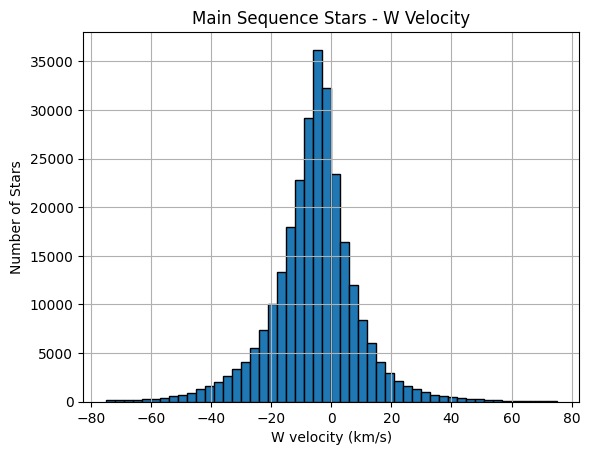

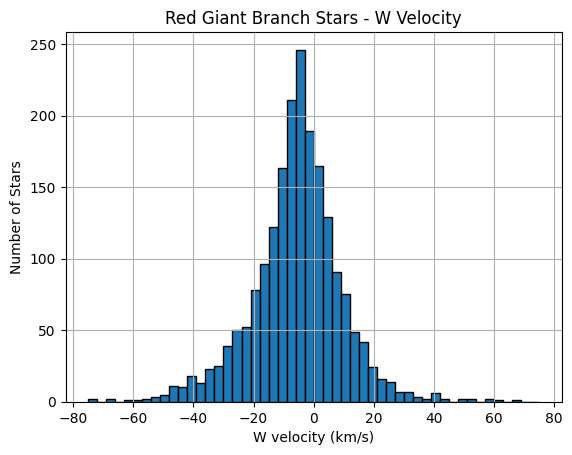

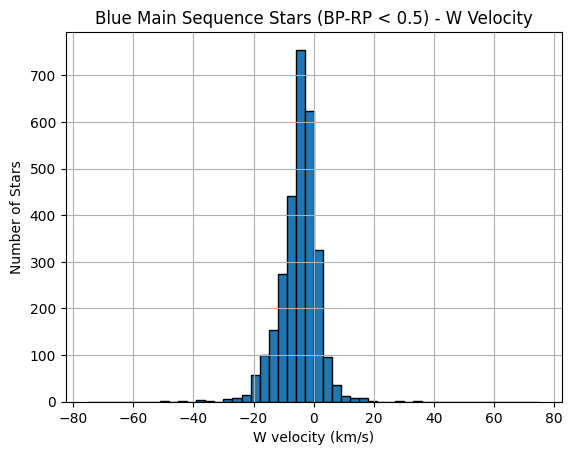

In [31]:
bins = 50
range_min, range_max = -75, 75

# Main Sequence
plt.figure()
plt.hist(W[gaia_data['star_type'] == 1], bins=bins, range=(range_min, range_max), edgecolor='black')
plt.title('Main Sequence Stars - W Velocity')
plt.xlabel('W velocity (km/s)')
plt.ylabel('Number of Stars')
plt.grid(True)
plt.show()

# Red Giant Branch
plt.figure()
plt.hist(W[gaia_data['star_type'] == 2], bins=bins, range=(range_min, range_max), edgecolor='black')
plt.title('Red Giant Branch Stars - W Velocity')
plt.xlabel('W velocity (km/s)')
plt.ylabel('Number of Stars')
plt.grid(True)
plt.show()

# Blue MS Stars (BP-RP < 0.5)
plt.figure()
blue_mask = (gaia_data['star_type'] == 1) & (gaia_data['bp_rp'] < 0.5)
plt.hist(W[blue_mask], bins=bins, range=(range_min, range_max), edgecolor='black')
plt.title('Blue Main Sequence Stars (BP-RP < 0.5) - W Velocity')
plt.xlabel('W velocity (km/s)')
plt.ylabel('Number of Stars')
plt.grid(True)
plt.show()

We can see that for the three categories we looked at, they look normally distributed, with the mean in the bin (-6 -> -3) km/s. The MS stars and the red giants seem similarly distributed. The blue MS stars have a tighter distribution (lower standard deviation) around the mean. This can be explained by the fact that the blue MS stars are still new and have not had time to move far from their birth place. The red giants are older and have had more time to move away from their birth place. Also, the MS stars contain a large amount of stars of which most of them are older.

We assume that for the stars in the sample, the velocity distribution is isotropic. This means that the stars are equally likely to be moving in any direction. This is a reasonable assumption for stars in the Milky Way galaxy, as they are all orbiting around the center of the galaxy. Thus, the average of the W velocities should be zero. We will take any deviation from the 0 to be coming from the motion of the Sun through the galaxy. $$W_{Sun} = -\langle W\rangle$$ <br>

In [35]:
w_sun=-np.mean(W)
print('W_sun = ', w_sun, 'km/s')

W_sun =  5.583342023737045 km/s
